In [41]:
%load_ext autoreload
%autoreload 2

import numpy as np
from scipy.linalg import sqrtm

import matplotlib.pyplot as plt

from tqdm.auto import tqdm

from Network import Network, IsingTensorNetwork, plot, detailed_plot

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Ising Tensor Network

In [97]:
N = 2; beta = 1;
tn = IsingTensorNetwork(N, beta)
dot = detailed_plot(tn)
dot.render('graph');

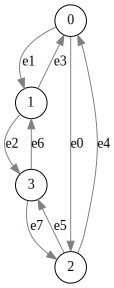

In [95]:
dot

In [99]:
dot.render('Ising TN');

# Visualize Contractions

In [56]:
import matplotlib.image as mpimg

images = []

img = mpimg.imread('graph.jpg')
images.append(img)

contraction_order = list(tn.edges.keys())
for e in contraction_order:
    tn.contract(e)
    
    dot = detailed_plot(tn)
    dot.render('graph');    
#     os.remove('graph.jpg')
    
    img = mpimg.imread('graph.jpg')
    images.append(img)


0it [00:00, ?it/s]

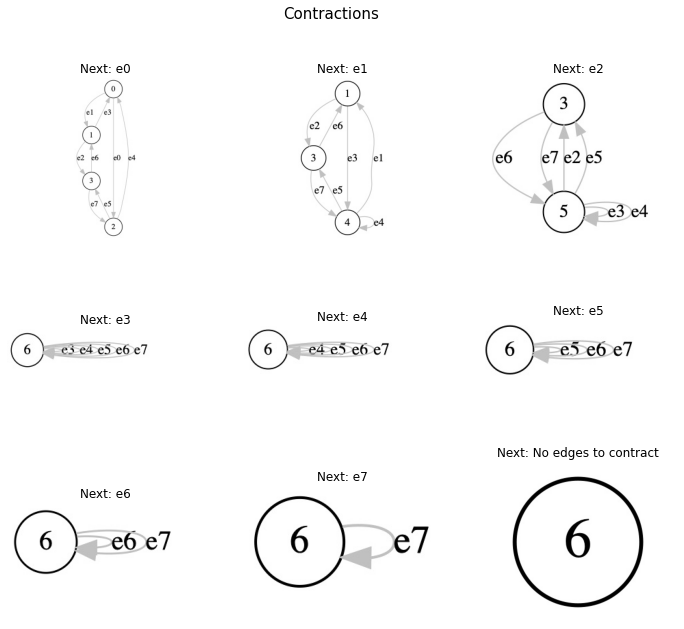

In [100]:
f = plt.figure(figsize=(12, 10)); 
plt.suptitle('Contractions' , fontsize=15)

contraction_order += ['No edges to contract']
for i,img in tqdm(enumerate(images)):
    f.add_subplot(3,3,i+1);
    plt.imshow(img)
    plt.axis('off')
    plt.title(f'Next: {contraction_order[i]}')
    
plt.savefig('Example Contraction.jpg')

# Evaluate Statistical Variables to Test the Algorithm

beta:   0%|          | 0/32 [00:00<?, ?it/s]

Contracting edges:   0%|          | 0/8 [00:00<?, ?it/s]

Contracting edges:   0%|          | 0/8 [00:00<?, ?it/s]

Contracting edges:   0%|          | 0/8 [00:00<?, ?it/s]

Contracting edges:   0%|          | 0/8 [00:00<?, ?it/s]

Contracting edges:   0%|          | 0/8 [00:00<?, ?it/s]

Contracting edges:   0%|          | 0/8 [00:00<?, ?it/s]

Contracting edges:   0%|          | 0/8 [00:00<?, ?it/s]

Contracting edges:   0%|          | 0/8 [00:00<?, ?it/s]

Contracting edges:   0%|          | 0/8 [00:00<?, ?it/s]

Contracting edges:   0%|          | 0/8 [00:00<?, ?it/s]

Contracting edges:   0%|          | 0/8 [00:00<?, ?it/s]

Contracting edges:   0%|          | 0/8 [00:00<?, ?it/s]

Contracting edges:   0%|          | 0/8 [00:00<?, ?it/s]

Contracting edges:   0%|          | 0/8 [00:00<?, ?it/s]

Contracting edges:   0%|          | 0/8 [00:00<?, ?it/s]

Contracting edges:   0%|          | 0/8 [00:00<?, ?it/s]

Contracting edges:   0%|          | 0/8 [00:00<?, ?it/s]

Contracting edges:   0%|          | 0/8 [00:00<?, ?it/s]

Contracting edges:   0%|          | 0/8 [00:00<?, ?it/s]

Contracting edges:   0%|          | 0/8 [00:00<?, ?it/s]

Contracting edges:   0%|          | 0/8 [00:00<?, ?it/s]

Contracting edges:   0%|          | 0/8 [00:00<?, ?it/s]

Contracting edges:   0%|          | 0/8 [00:00<?, ?it/s]

Contracting edges:   0%|          | 0/8 [00:00<?, ?it/s]

Contracting edges:   0%|          | 0/8 [00:00<?, ?it/s]

Contracting edges:   0%|          | 0/8 [00:00<?, ?it/s]

Contracting edges:   0%|          | 0/8 [00:00<?, ?it/s]

Contracting edges:   0%|          | 0/8 [00:00<?, ?it/s]

Contracting edges:   0%|          | 0/8 [00:00<?, ?it/s]

Contracting edges:   0%|          | 0/8 [00:00<?, ?it/s]

Contracting edges:   0%|          | 0/8 [00:00<?, ?it/s]

Contracting edges:   0%|          | 0/8 [00:00<?, ?it/s]

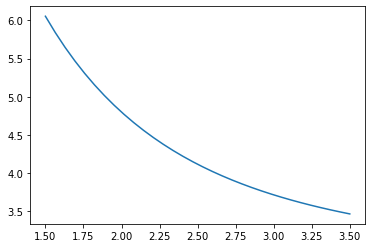

In [10]:
N = 2

Ts = np.linspace(1.5, 3.5, 32) # Tc ~ 2.5 for N = Infinity lattice.
betas = 1/Ts
# betas = np.linspace(0.25, 1, 32)

Zs = []

for beta in tqdm(betas, desc='beta'):
    tn = IsingTensorNetwork(N, beta)
    tn.contract_to_scalar()
    Z = list(tn.tensors.values())[0]
    Zs.append(Z)
    
plt.plot(Ts, np.log(Zs));


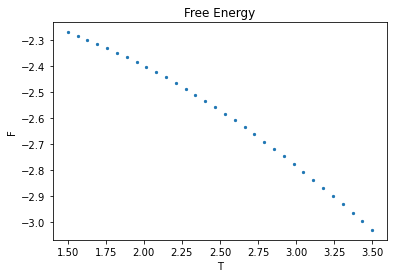

In [41]:
ln_Z = np.log(Zs)
Fs = -Ts * ln_Z/ (N**2)
plt.scatter(Ts, Fs, s=5);
plt.title('Free Energy');
plt.xlabel('T');
plt.ylabel('F');

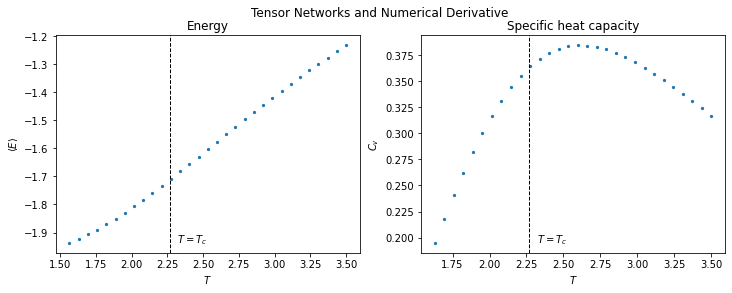

In [14]:
Tc = 2/np.log(1 + np.sqrt(2))

# Energy
dln_Z_d = [(ln_Z[i+1]-ln_Z[i])/(betas[i+1]-betas[i])
                 for i in range(ln_Z.shape[0]-1)]
dln_Z_d = np.array(dln_Z_d)/N**2
E = -dln_Z_d

# Specific heat
dln_Z_d2 = [(dln_Z_d[i+1]-dln_Z_d[i])/(betas[i+1]-betas[i])
           for i in range(dln_Z_d.shape[0]-1)]
dln_Z_d2 = np.array(dln_Z_d2)
Delta_E2 = dln_Z_d2
C =  Delta_E2/Ts[2:]**2

Ts = 1/betas

f = plt.figure(figsize=(12, 4)); #  

f.add_subplot(1,2,1);
plt.scatter(Ts[1:], E, s=5)
plt.axvline(x=Tc, c='k', linewidth=1, linestyle='--')
plt.annotate(r'$T = T_c$', xy=(Tc+0.05,np.min(E)), fontsize=10);
plt.xlabel(r'$ T $')
plt.ylabel(r'$ \langle E \rangle $');
plt.title('Energy');

f.add_subplot(1,2,2);
plt.scatter(Ts[2:], C, s=5)
plt.axvline(x=Tc, c='k', linewidth=1, linestyle='--')
plt.annotate(r'$T = T_c$', xy=(Tc+0.05,np.min(C)), fontsize=10);
plt.xlabel(r'$ T $')
plt.ylabel(r'$ C_{v} $');
plt.title('Specific heat capacity');

plt.suptitle('Tensor Networks and Numerical Derivative');
# plt.savefig('TN E and C.jpg')

# Demonstration of dependency of contraction time on contraction order

In [58]:
tn = IsingTensorNetwork(N, beta)
edges=list(tn.edges.keys())

In [92]:
from itertools import permutations
from time import time
import random

contraction_orders = list(permutations(edges))
times = []

for order in tqdm(contraction_orders[:100]):
    tn = IsingTensorNetwork(N, beta)
    start = time()
    tn.contract_edges(order)
    end = time()
    
    times.append(end-start)
    
    del tn
    

  0%|          | 0/100 [00:00<?, ?it/s]

Contracting edges:   0%|          | 0/8 [00:00<?, ?it/s]

Contracting edges:   0%|          | 0/8 [00:00<?, ?it/s]

Contracting edges:   0%|          | 0/8 [00:00<?, ?it/s]

Contracting edges:   0%|          | 0/8 [00:00<?, ?it/s]

Contracting edges:   0%|          | 0/8 [00:00<?, ?it/s]

Contracting edges:   0%|          | 0/8 [00:00<?, ?it/s]

Contracting edges:   0%|          | 0/8 [00:00<?, ?it/s]

Contracting edges:   0%|          | 0/8 [00:00<?, ?it/s]

Contracting edges:   0%|          | 0/8 [00:00<?, ?it/s]

Contracting edges:   0%|          | 0/8 [00:00<?, ?it/s]

Contracting edges:   0%|          | 0/8 [00:00<?, ?it/s]

Contracting edges:   0%|          | 0/8 [00:00<?, ?it/s]

Contracting edges:   0%|          | 0/8 [00:00<?, ?it/s]

Contracting edges:   0%|          | 0/8 [00:00<?, ?it/s]

Contracting edges:   0%|          | 0/8 [00:00<?, ?it/s]

Contracting edges:   0%|          | 0/8 [00:00<?, ?it/s]

Contracting edges:   0%|          | 0/8 [00:00<?, ?it/s]

Contracting edges:   0%|          | 0/8 [00:00<?, ?it/s]

Contracting edges:   0%|          | 0/8 [00:00<?, ?it/s]

Contracting edges:   0%|          | 0/8 [00:00<?, ?it/s]

Contracting edges:   0%|          | 0/8 [00:00<?, ?it/s]

Contracting edges:   0%|          | 0/8 [00:00<?, ?it/s]

Contracting edges:   0%|          | 0/8 [00:00<?, ?it/s]

Contracting edges:   0%|          | 0/8 [00:00<?, ?it/s]

Contracting edges:   0%|          | 0/8 [00:00<?, ?it/s]

Contracting edges:   0%|          | 0/8 [00:00<?, ?it/s]

Contracting edges:   0%|          | 0/8 [00:00<?, ?it/s]

Contracting edges:   0%|          | 0/8 [00:00<?, ?it/s]

Contracting edges:   0%|          | 0/8 [00:00<?, ?it/s]

Contracting edges:   0%|          | 0/8 [00:00<?, ?it/s]

Contracting edges:   0%|          | 0/8 [00:00<?, ?it/s]

Contracting edges:   0%|          | 0/8 [00:00<?, ?it/s]

Contracting edges:   0%|          | 0/8 [00:00<?, ?it/s]

Contracting edges:   0%|          | 0/8 [00:00<?, ?it/s]

Contracting edges:   0%|          | 0/8 [00:00<?, ?it/s]

Contracting edges:   0%|          | 0/8 [00:00<?, ?it/s]

Contracting edges:   0%|          | 0/8 [00:00<?, ?it/s]

Contracting edges:   0%|          | 0/8 [00:00<?, ?it/s]

Contracting edges:   0%|          | 0/8 [00:00<?, ?it/s]

Contracting edges:   0%|          | 0/8 [00:00<?, ?it/s]

Contracting edges:   0%|          | 0/8 [00:00<?, ?it/s]

Contracting edges:   0%|          | 0/8 [00:00<?, ?it/s]

Contracting edges:   0%|          | 0/8 [00:00<?, ?it/s]

Contracting edges:   0%|          | 0/8 [00:00<?, ?it/s]

Contracting edges:   0%|          | 0/8 [00:00<?, ?it/s]

Contracting edges:   0%|          | 0/8 [00:00<?, ?it/s]

Contracting edges:   0%|          | 0/8 [00:00<?, ?it/s]

Contracting edges:   0%|          | 0/8 [00:00<?, ?it/s]

Contracting edges:   0%|          | 0/8 [00:00<?, ?it/s]

Contracting edges:   0%|          | 0/8 [00:00<?, ?it/s]

Contracting edges:   0%|          | 0/8 [00:00<?, ?it/s]

Contracting edges:   0%|          | 0/8 [00:00<?, ?it/s]

Contracting edges:   0%|          | 0/8 [00:00<?, ?it/s]

Contracting edges:   0%|          | 0/8 [00:00<?, ?it/s]

Contracting edges:   0%|          | 0/8 [00:00<?, ?it/s]

Contracting edges:   0%|          | 0/8 [00:00<?, ?it/s]

Contracting edges:   0%|          | 0/8 [00:00<?, ?it/s]

Contracting edges:   0%|          | 0/8 [00:00<?, ?it/s]

Contracting edges:   0%|          | 0/8 [00:00<?, ?it/s]

Contracting edges:   0%|          | 0/8 [00:00<?, ?it/s]

Contracting edges:   0%|          | 0/8 [00:00<?, ?it/s]

Contracting edges:   0%|          | 0/8 [00:00<?, ?it/s]

Contracting edges:   0%|          | 0/8 [00:00<?, ?it/s]

Contracting edges:   0%|          | 0/8 [00:00<?, ?it/s]

Contracting edges:   0%|          | 0/8 [00:00<?, ?it/s]

Contracting edges:   0%|          | 0/8 [00:00<?, ?it/s]

Contracting edges:   0%|          | 0/8 [00:00<?, ?it/s]

Contracting edges:   0%|          | 0/8 [00:00<?, ?it/s]

Contracting edges:   0%|          | 0/8 [00:00<?, ?it/s]

Contracting edges:   0%|          | 0/8 [00:00<?, ?it/s]

Contracting edges:   0%|          | 0/8 [00:00<?, ?it/s]

Contracting edges:   0%|          | 0/8 [00:00<?, ?it/s]

Contracting edges:   0%|          | 0/8 [00:00<?, ?it/s]

Contracting edges:   0%|          | 0/8 [00:00<?, ?it/s]

Contracting edges:   0%|          | 0/8 [00:00<?, ?it/s]

Contracting edges:   0%|          | 0/8 [00:00<?, ?it/s]

Contracting edges:   0%|          | 0/8 [00:00<?, ?it/s]

Contracting edges:   0%|          | 0/8 [00:00<?, ?it/s]

Contracting edges:   0%|          | 0/8 [00:00<?, ?it/s]

Contracting edges:   0%|          | 0/8 [00:00<?, ?it/s]

Contracting edges:   0%|          | 0/8 [00:00<?, ?it/s]

Contracting edges:   0%|          | 0/8 [00:00<?, ?it/s]

Contracting edges:   0%|          | 0/8 [00:00<?, ?it/s]

Contracting edges:   0%|          | 0/8 [00:00<?, ?it/s]

Contracting edges:   0%|          | 0/8 [00:00<?, ?it/s]

Contracting edges:   0%|          | 0/8 [00:00<?, ?it/s]

Contracting edges:   0%|          | 0/8 [00:00<?, ?it/s]

Contracting edges:   0%|          | 0/8 [00:00<?, ?it/s]

Contracting edges:   0%|          | 0/8 [00:00<?, ?it/s]

Contracting edges:   0%|          | 0/8 [00:00<?, ?it/s]

Contracting edges:   0%|          | 0/8 [00:00<?, ?it/s]

Contracting edges:   0%|          | 0/8 [00:00<?, ?it/s]

Contracting edges:   0%|          | 0/8 [00:00<?, ?it/s]

Contracting edges:   0%|          | 0/8 [00:00<?, ?it/s]

Contracting edges:   0%|          | 0/8 [00:00<?, ?it/s]

Contracting edges:   0%|          | 0/8 [00:00<?, ?it/s]

Contracting edges:   0%|          | 0/8 [00:00<?, ?it/s]

Contracting edges:   0%|          | 0/8 [00:00<?, ?it/s]

Contracting edges:   0%|          | 0/8 [00:00<?, ?it/s]

Contracting edges:   0%|          | 0/8 [00:00<?, ?it/s]

/Users/mathewalex/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


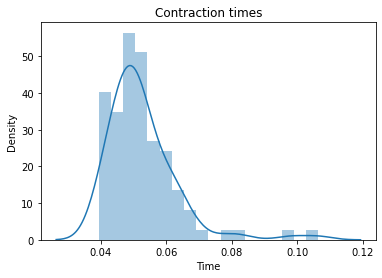

In [96]:
import seaborn as sb
sb.distplot(times);
plt.xlabel('Time');
plt.title('Contraction times');
plt.savefig('Contraction Times.jpg')